Here: Let's get our libraries imported, and write a couple of classes for convenience

In [3]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)
widths = np.arange(1, 31)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

In [4]:
from scipy.fftpack import fft, ifft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
y



yinv = ifft(y)
yinv


array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j])

In [5]:
import csv
import re
import pandas_datareader.data as web
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt
import pandas
import datetime as dt
style.use('ggplot')

start = dt.datetime(2000,1,1)
end = dt.datetime(2017,12,31)

In [6]:
SYMBOLS=[]
with open('companylist.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        SYMBOLS.append(row[0])
#print(SYMBOLS)


AlNumSymbols=[]
for sym in SYMBOLS:
    if (re.match('^[\w-]+$', sym) is not None):
        AlNumSymbols.append(sym)
        
        
del AlNumSymbols[0]

In [7]:
class Stock:
    def __init__(self, symbol, feed):
        
        start = dt.datetime(2000,1,1)
        end = dt.datetime(2017,12,31)
        self.symbol=symbol
        self.data=web.DataReader(symbol,feed,start,end)['Adj Close']
        self.fft_hist=np.histogram(abs(fft(self.data.values)), 20)[0].tolist()
        # self.cwt_hist=[] maybe do later.. maybe other parameters/kernels too...
        # Age
        # Sentiment
        self.max=np.amax(self.data.values)
        self.min=np.amin(self.data.values)
        self.first=self.data.values[0]
        self.last=self.data.values[-1]

    def give_stock_data(self):
        out=[]
        out.extend(self.fft_hist)
        out.append(self.max)
        out.append(self.min)
        out.append(self.first)
        out.append(self.last)
        return out


In [8]:

class MarketClassifier:
    def __init__(self,SymbolList,feed):
        self.stockList=[]
        for sym in SymbolList: # Get rid of index for full implementation. For Testing, keep it. (Takes a while to download everything)
            try:
                print(sym)
                addSymbol=Stock(sym,feed)
                self.stockList.append(addSymbol)
            except KeyError:
                pass


    def plot(self):
        pass
    
    def classify(self,method):
        pass
    

In [77]:
John=MarketClassifier(AlNumSymbols,'yahoo') # SKIP THIS>> Load from myTestData.npy

DDD
MMM
WBAI
WUBA
EGHT
AHC
ATEN
AAC
AIR
AAN
ABB
ABT
ABBV
ANF
AGD
AWP
ACP
JEQ
AOD
ABM
AKR
ACN
ACCO
ATV
ATU
AYI
GOLF
ADX
PEO
AGRO
ADNT
ADT
ATGE
AAP
ADSW
WMS
ASIX
AAV
AVK
ACM
ANW
AEB
AED
AEG
AEH
AER
HIVE
AJRD
AET
AMG
AFL
MITT
AGCO
A
AEM
ADC
AL
APD
AYR
AKS
ALG
AGI
ALK
AIN
ALB
AA
ALEX
ALX
ARE
AQN
BABA
Y
ATI
ALLE
AGN
ALE
AKP
ADS
AFB
AWF
AB
LNT
CBH
NCV
NCZ
ACV
NIE
NFJ
ALSN
ALL
ALLY
AYX
ATUS
MO
ACH
AMBR
ABEV
AMC
AEE
AMRC
AMOV
AMX
AAT
AXL
ACC
AEO
AEP
AEL
AXP
AFG
AFGE
AFGH
AMH
AIG
AMID
ARL
ARA
AWR
AMT
AVD
AWK
COLD
APU
AMP
ABC
ANFI
AMN
AMRX
AP
APH
AXR
AME
AFSS
AFST
APC
ANDV
ANDX
AU
BUD
AXE
NLY
AMGP
AM
AR
ANTM
ANH
AON
APA
AIV
APY
ARI
APO
AIY
AFT
AIF
APLE
AIT
ATR
APTV
WTR
AQ
WAAS
ARMK
ABR
ARC
MT
ARCH
ADM
AROC
ARNC
ARCO
RCUS
ARD
ASC
AFC
ACRE
ARDC
ARES
AGX
ARGD
ARGO
ANET
AI
AIC
AIW
ARLO
AHH
ARR
AFI
AWI
ARW
AJG
APAM
ASA
ABG
ASX
ASGN
AHT
ASH
APB
ASPN
AHL
ASB
AC
AIZ
AIZP
AGO
AZN
HOME
T
TBB
TBC
ATTO
ATH
ATKR
AT
ATO
AUO
ATHM
ALV
AN
AZO
AVLR
AVB
AGR
AVNS
AVYA
AVY
AVH
AVA
AVP
AVX
EQH
AXTA
AXS
AZUL
AZRE
AZZ


REVG
REV
REX
REXR
RXN
RH
RNG
RIO
RBA
RAD
RIV
OPP
RLI
RLJ
RRTS
RHI
ROK
COL
RCI
ROG
ROL
ROP
RST
RDC
RY
RBS
RCL
RGT
RMT
RVT
RES
RPM
RTEC
RYB
R
RYI
RHP
SPGI
SBR
SB
SFE
SAFE
SAIL
CRM
SMM
SBH
SJT
SN
SD
SDT
SDR
PER
SNY
SC
SAP
SAB
SAF
SAR
SSL
BFS
SCG
SLB
SNDR
SWM
SAIC
SALT
SLTB
SBBC
SBNA
STNG
SMG
KMM
KTF
KST
KSM
SE
SA
CKH
SMHI
SDRL
SDLP
SEE
SSW
SSWA
SSWN
SEAS
JBN
JBR
WTTR
SEM
SGZA
SEMG
SMI
SRE
SEND
ST
SXT
SQNS
SRG
SCI
SERV
NOW
SHAK
SJR
SHLX
SHW
SHG
SFL
SHOP
SSTK
SBGL
SIG
SBOW
SPG
SSD
SHI
SITE
SIX
SJW
SKM
SKX
SKY
SLG
SM
SFS
SMAR
SNN
AOS
SNAP
SNA
IPOA
SQM
SOGO
SOI
SAH
SON
SNE
BID
SOR
SJI
SJIU
SXE
SO
SOJA
SOJB
SOJC
SCCO
LUV
SWX
SWN
SPA
SPE
SEP
TRK
SR
SPR
SAVE
SMTA
SRC
SPOT
SRLP
S
SPXC
FLOW
SQ
JOE
STAG
SSI
SMP
SXI
SWJ
SWK
SWP
STN
SGU
SRT
STWD
STT
SPLP
SCS
SCA
SCM
SCL
STE
STL
STC
SF
SFB
STM
EDF
EDI
STON
SRI
STOR
GJH
GJO
GJS
SYK
RGR
SPH
SMFG
INN
SUM
SMLP
SUI
SLF
SXCP
SXC
SU
STG
SUN
SHO
STI
SPN
SUP
SVU
SLD
SLDA
SLDD
SWZ
SWCH
SYF
SNX
SNV
GJP
GJR
GJT
GJV
SYY
SYX
DATA
TAHO
TLRD
TWN
TSM
TAL
TGE
TALO
SKT


In [78]:
arr=np.empty((0,24))
for stock in John.stockList:
    arr=np.append(arr,[stock.give_stock_data()],axis=0)

In [79]:
print(arr)

[[4.51100000e+03 4.00000000e+00 0.00000000e+00 ... 1.29666662e+00
  2.75000000e+00 8.64000034e+00]
 [4.51100000e+03 1.00000000e+01 2.00000000e+00 ... 2.34632149e+01
  2.76688499e+01 2.30853424e+02]
 [1.02200000e+03 4.00000000e+00 2.00000000e+00 ... 8.69999981e+00
  2.00100002e+01 1.01099997e+01]
 ...
 [2.95000000e+02 0.00000000e+00 0.00000000e+00 ... 1.10824308e+01
  1.63522606e+01 1.56417217e+01]
 [4.08000000e+02 4.00000000e+00 0.00000000e+00 ... 5.78000021e+00
  8.13500023e+00 7.71899986e+00]
 [1.66000000e+02 4.00000000e+00 0.00000000e+00 ... 6.48000002e+00
  1.30000000e+01 7.59299994e+00]]


In [84]:

with open('myTempData.npy','wb') as outfile:
    np.save(outfile,arr)

Start Here

In [9]:
marketData=np.load('myTempData.npy')

In [10]:
marketData[:,0]=np.log(marketData[:,0])

Great! Now that we've gotten our data loaded in, we're ready to start trying different ways of analyzing it.

to start, let's use t-SNE to visualize the data

In [11]:
from sklearn.manifold import TSNE

marketData_embedded=TSNE(n_components=2).fit_transform(marketData)

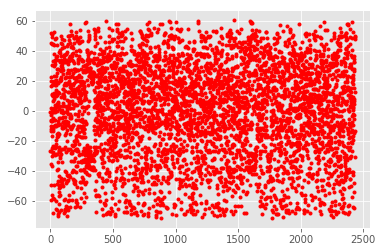

In [12]:
plt.plot(marketData_embedded,'r.')

plt.show()

Yeah, I guess I'm not really seeing different classes here...
it does seem like there's some concentration along the y axis i.e. at -70,-50 the big clump and near 75

Let's try PCA.

In [13]:
from sklearn.decomposition import PCA
marketData_PCA = PCA(n_components=2)
marketData_PCA.fit(marketData)
x=marketData_PCA.transform(marketData)

In [14]:
    d = np.linalg.norm((x - np.median(x,axis=0)), axis=1)
    

In [15]:
print(d)

[ 61.90743309 221.50513331  14.77756515 ...  19.25595827  28.72991901
  24.2352146 ]


In [16]:
print((x - np.median(x,axis=0)))

[[ 59.58060444 -16.81314504]
 [203.3039891   87.93186054]
 [ 14.7447854    0.98373533]
 ...
 [-19.25389301   0.2820157 ]
 [-26.68490332 -10.64538309]
 [-23.43877292  -6.16194374]]


In [17]:
def reject_outliers(data, m ): #I guess a lot of the sparse cluster would be considered an outlier
    # i.e a couple stdev outside the mean, but that's not really what I'm going for. There are some 20 
    # outliers which are about 25 outside the median, and don't fall in this sort of rectangle. I don't 
    # want those. (But the sparse clusters probably have about 25% of the data, so I don't want to get rid of them)
    d = np.linalg.norm((data - np.median(data,axis=0)), axis=1)
    mdev = np.median(d,axis=0)
    s = d/mdev if mdev else 0.
    return data[s<m,:]

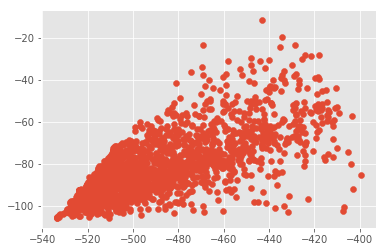

In [31]:
marketData_PCA_outlier=reject_outliers(marketData_PCA.transform(marketData),4)
x=marketData_PCA_outlier[:,0]
y=marketData_PCA_outlier[:,1]


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)


ax.scatter(x,y)
plt.show()

In [19]:
marketData_PCA_outlier


array([[-482.05606053,  -83.25005577],
       [-498.93730993,  -95.28014247],
       [-524.86104856,  -98.22373087],
       ...,
       [-516.05473895,  -83.95177541],
       [-523.48574926,  -94.8791742 ],
       [-520.23961885,  -90.39573484]])

OK, finally got the outliers out. Now let's try some classifications:

I'm gonna call it a day, but tomorrow, let's try some actual classification techniques. (on or not on the preprocessed data)

Also, let's consider other info we could be using or stressing. 
maybe fourier isn't as important.
maybe wavelet is amazing
maybe it's better to use a cubic spline or something

Let's try K-Means,

DBSCAN

Agglomerative

Ward


In [20]:
from sklearn.cluster import KMeans

In [21]:
marketData_KMeans=KMeans(n_clusters=12).fit_predict(marketData_PCA_outlier)

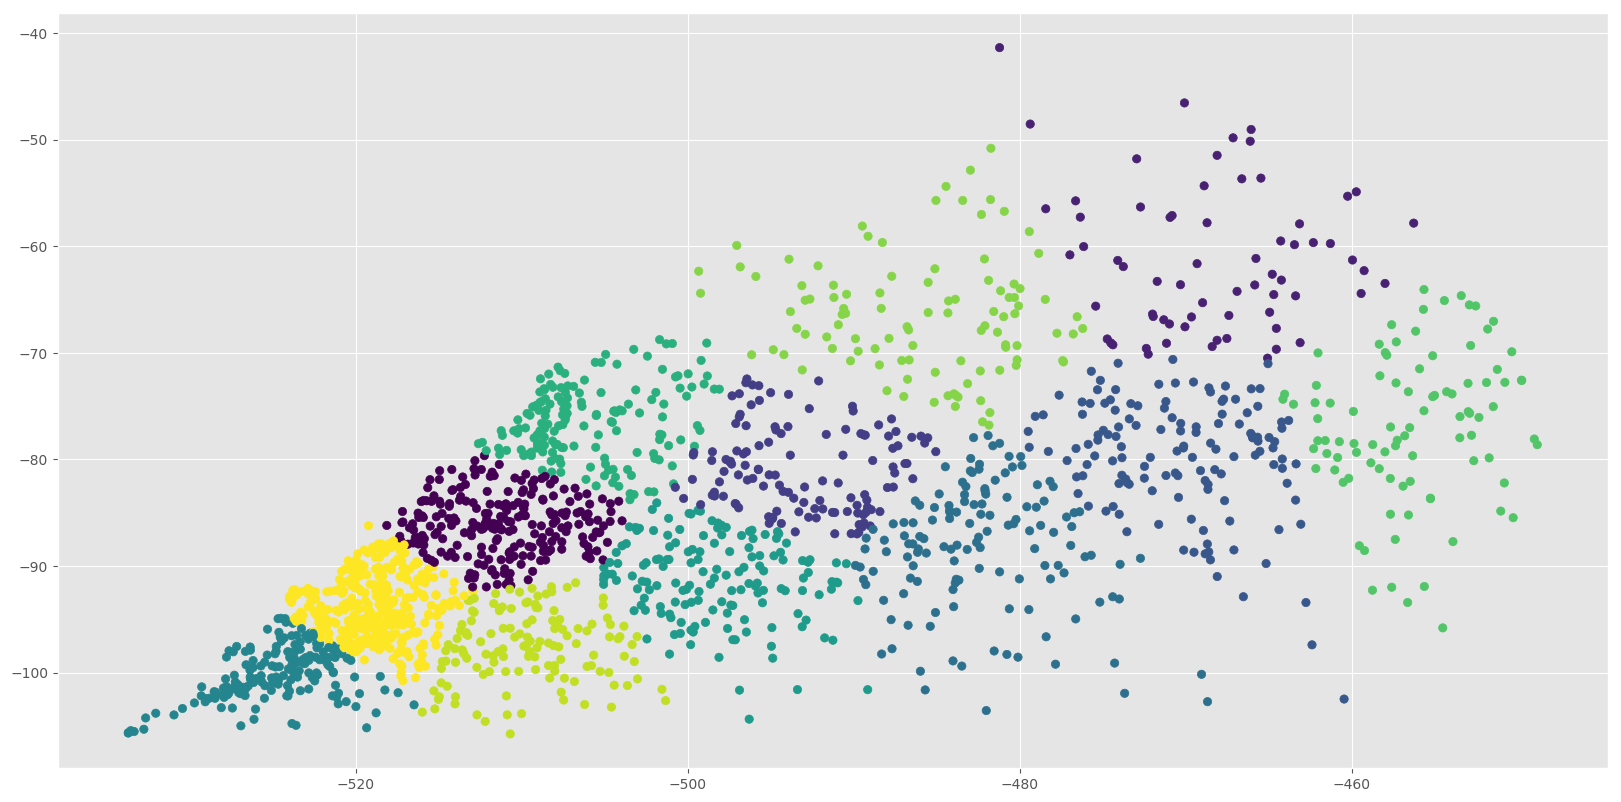

In [22]:
x=marketData_PCA_outlier[:,0]
y=marketData_PCA_outlier[:,1]


fig = plt.figure(figsize=(20,10),dpi=100)
ax = fig.add_subplot(1, 1, 1)


plt.scatter(marketData_PCA_outlier[:, 0], 
            marketData_PCA_outlier[:, 1], c=marketData_KMeans)


plt.show()



In [23]:
from sklearn.cluster import MiniBatchKMeans

In [26]:
from sklearn.cluster import DBSCAN

db=DBSCAN(eps=5, min_samples=15).fit(marketData_PCA_outlier)

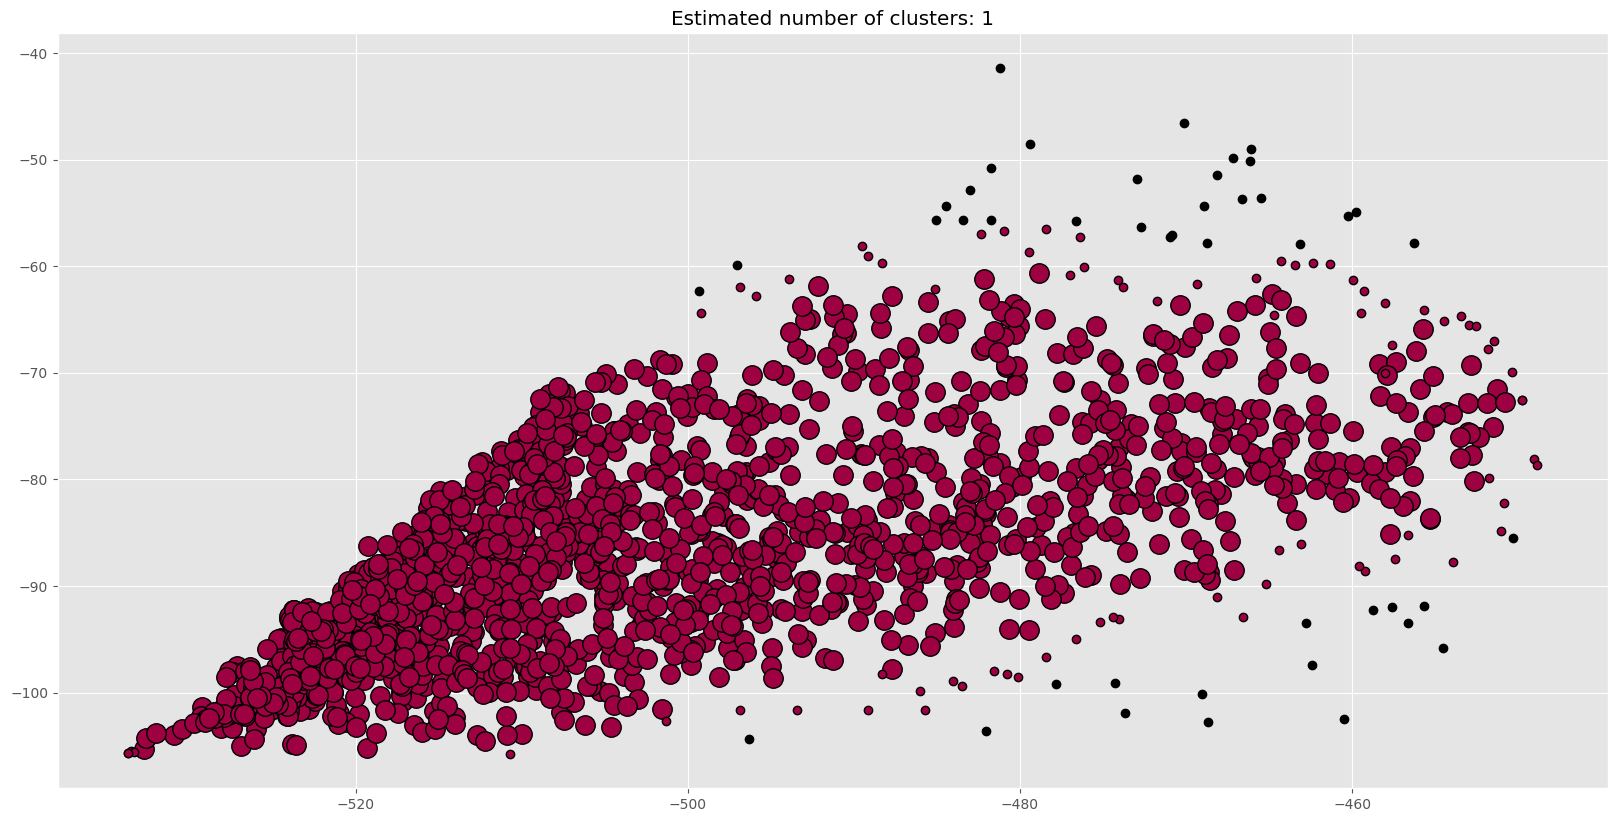

In [27]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)

fig = plt.figure(figsize=(20,10),dpi=100)

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = marketData_PCA_outlier[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = marketData_PCA_outlier[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

    

plt.title('Estimated number of clusters: %d' % n_clusters_)

plt.show()

In [72]:
db_raw=DBSCAN(eps=3, min_samples=3).fit(marketData)

In [73]:
db_raw_PCA=PCA(n_components=2)
db_raw_PCA.fit(marketData)
db_raw_to_PCA=db_raw_PCA.transform(marketData)

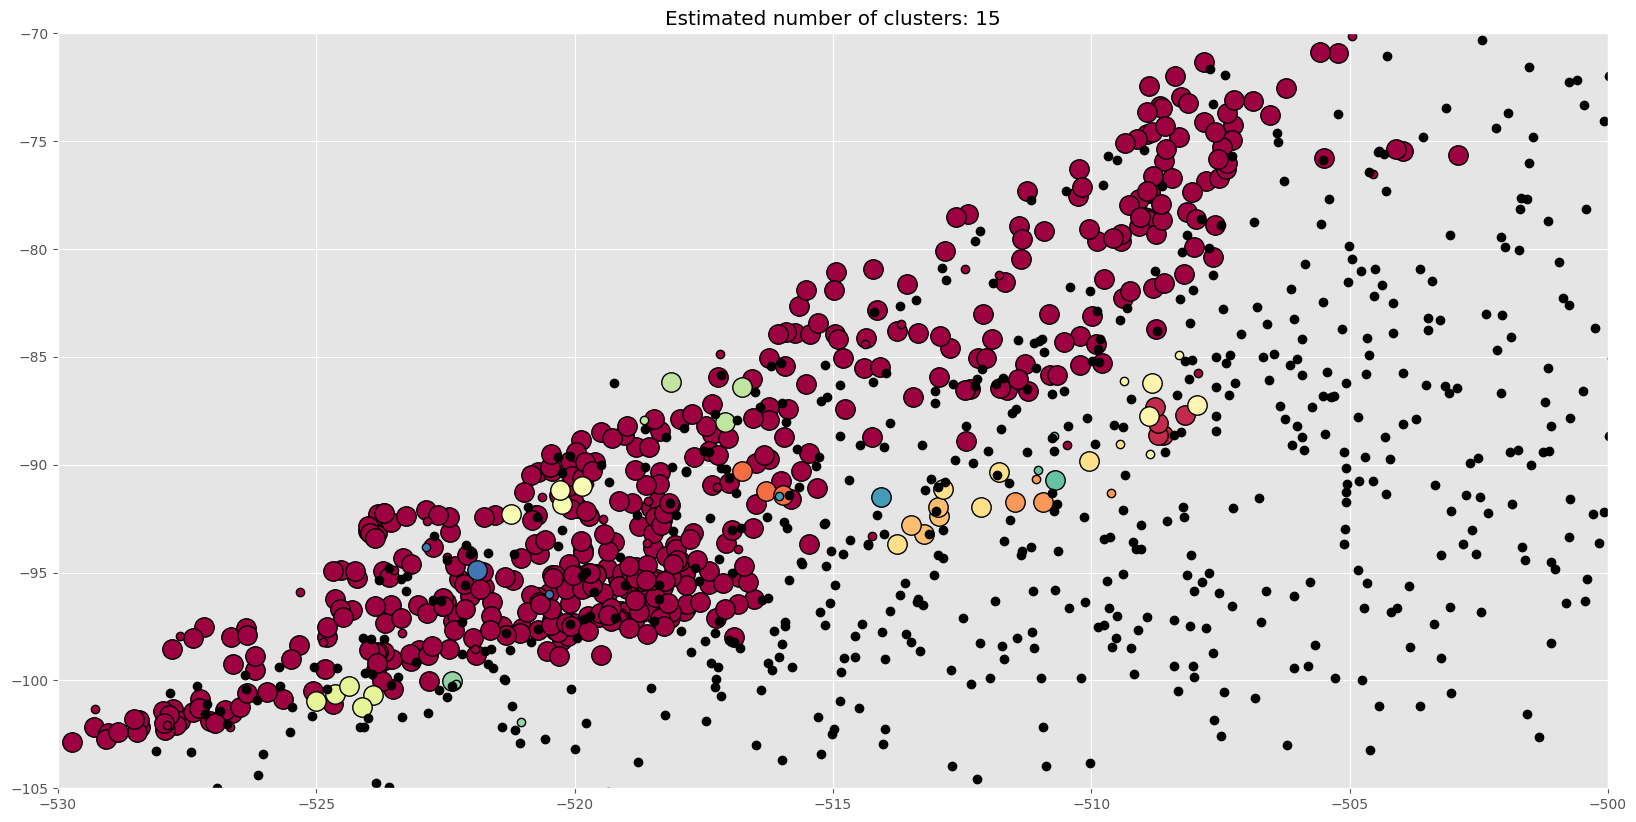

In [74]:
core_samples_mask = np.zeros_like(db_raw.labels_, dtype=bool)
core_samples_mask[db_raw.core_sample_indices_] = True
labels = db_raw.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)

fig = plt.figure(figsize=(20,10),dpi=100)

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = db_raw_to_PCA[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = db_raw_to_PCA[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

#plt.ylim(-110,-10)
#plt.xlim(-540,-400)    
plt.ylim(-105,-70)
plt.xlim(-530,-500)    
plt.title('Estimated number of clusters: %d' % n_clusters_)

plt.show()


